In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")

In [3]:
import SenseEmb

In [4]:
skv = SenseEmb.SenseKeyedVectors.load_from_kv("../data/sense-emb-asbc5-600k-d50.kv")

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import numpy.linalg as la
from tqdm.auto import tqdm
import json

In [33]:
plt.rcParams["font.family"] = "Microsoft JhengHei"
plt.rcParams["axes.unicode_minus"] = False

In [6]:
## get cwn instance from SKV
cwn = skv.cwn

In [30]:
target = "語言"
cwn.find_all_senses(target)

[<CwnSense[06530201](語言): 人類以口語進行因族群而不同的溝通系統。>,
 <CwnSense[06530202](語言): 以語音或約定俗成符號所組成的系統性溝通方式。>,
 <CwnSense[06530203](語言): 因特定環境或領域所選用的特定詞彙。>,
 <CwnSense[06530204](語言): 指示電腦執行工作的指令，由符號與特定語法所組成的符號系統。>,
 <CwnSense[06530205](語言): 比喻具有獨特特色的表達與傳遞想法的方式。>]

In [41]:
lang_neighbors = [x[0] for x in skv.most_similar("語言-06530201")]
lang_neighbors.insert(0, "語言-06530201")
lang_neighbors

['語言-06530201',
 '文字-06691801',
 '宗教-06678601',
 '理論-06554901',
 '語言-06530203',
 '自然-03059306',
 '藝術-06559005',
 '倫理',
 '人文-06577302',
 '信仰',
 '傳統-06771001']

In [19]:
code_neighbors = [x[0] for x in skv.most_similar("語言-06530204")]
code_neighbors.insert(0, "語言-06530204")

In [40]:
code_neighbors

['語言-06530204',
 '浮點',
 '位址',
 '字符',
 '運算',
 'ＩＰ',
 '相對-06659304',
 '伺服器',
 '終端機',
 '編碼',
 '搜尋項']

In [23]:
vectors = []
labels = []
groups = [0] * len(lang_neighbors) + [1] * len(code_neighbors)
from itertools import chain
for token in chain(lang_neighbors, code_neighbors):
    vectors.append(skv.get_vector(token, norm=True))
    labels.append(token)
    groups
vectors = np.vstack(vectors)
vectors.shape

(22, 50)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [25]:
vec_proj = pca.fit_transform(vectors)

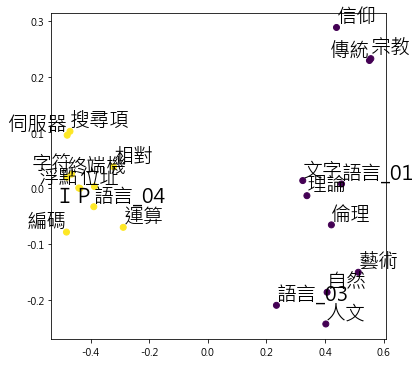

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(vec_proj[:, 0], vec_proj[:, 1], c=groups)
for i, lab in enumerate(labels):
    if lab.startswith(target):
        lab = lab[:lab.index("-")] + "_" + lab[-2:]
    else:
        lab = lab + "-"
        lab = lab[:lab.index("-")]
    
    vaval = "bottom"
    if lab == "ＩＰ":
        vaval = "top"
    if groups[i] == 1:
        haval = "left" if i % 2 else "right"
    elif lab == "傳統":
        haval = "right"
    else:
        haval = "left"
    plt.text(vec_proj[i, 0], vec_proj[i, 1], lab, 
             fontsize=20, ha=haval, va=vaval)

In [55]:
# cwn = CwnBase()
sense = cwn.find_lemma("^語言$")[0].senses[1]

In [56]:
sense.semantic_relations

[('synonym', <CwnSense[06008007](語): 以語音或約定俗成符號所組成的系統性溝通方式。>, 'forward'),
 ('hyponym', <CwnSense[07069502](繁): 臺灣所使用的中文書寫字體，為傳統之中文書寫字體。>, 'forward'),
 ('meronym', <CwnSense[04159001](俗語): 通俗流行的話語。>, 'forward'),
 ('hypernym', <CwnSense[06583901](知識): 透過學習所得到的對事物的認識和經驗的總和。>, 'forward'),
 ('synonym', <CwnSense[06008007](語): 以語音或約定俗成符號所組成的系統性溝通方式。>, 'reversed'),
 ('hypernym', <CwnSense[07069502](繁): 臺灣所使用的中文書寫字體，為傳統之中文書寫字體。>, 'reversed'),
 ('holonym', <CwnSense[04159001](俗語): 通俗流行的話語。>, 'reversed'),
 ('hyponym', <CwnSense[06583901](知識): 透過學習所得到的對事物的認識和經驗的總和。>, 'reversed')]

In [85]:
for sense_x in cwn.find_lemma("^語言$")[0].senses:
    print(sense_x)
    print(">> " + sense_x.examples[0])

<CwnSense[06530201](語言): 人類以口語進行因族群而不同的溝通系統。>
>> 國內外學術界都一致認為：台灣南島<語言>有很高的學術價值。
<CwnSense[06530202](語言): 以語音或約定俗成符號所組成的系統性溝通方式。>
>> 正確的學棋態度是：一方面要認真掌握技巧，以熟悉棋的<語言>。
<CwnSense[06530203](語言): 因特定環境或領域所選用的特定詞彙。>
>> 熟悉官場運作，並且擅於使用官場<語言>的范振宗，並不認為自己無法擺平派系問題。
<CwnSense[06530204](語言): 指示電腦執行工作的指令，由符號與特定語法所組成的符號系統。>
>> 它不但可做文件編輯和排版，同時還有圖形編修、文件轉換，以及巨集<語言>等功能。
<CwnSense[06530205](語言): 比喻具有獨特特色的表達與傳遞想法的方式。>
>> 音樂，是我理想中的一種<語言>，只要它能感動人感動身旁的一草一木，就是很美的<語言>。


In [63]:
kai = skv.make_sense_vectors("開")
chi = skv.make_sense_vectors("吃")

In [69]:
[(kai.sense_labels[i], kai.sense_freqs[i]) for i in np.argsort(kai.sense_freqs)[-3:]]

[('[06721045]進行會議。: 總務處<開>幾次協', 84),
 ('[06721072]形容有花植物的花朵長出並舒展。: 花朵朵<開>，把他', 100),
 ('[06721022]駕駛後述交通工具。: 也要學<開>飛機。', 118)]

In [71]:
sum(kai.sense_freqs)

1070

In [72]:
[(chi.sense_labels[i], chi.sense_freqs[i]) for i in np.argsort(chi.sense_freqs)[-3:]]

[('[05227009]比喻經歷後述負面事件。: 年來，<吃>官司的', 61),
 ('[05227002]服用藥物。: ，也像<吃>藥一樣', 80),
 ('[05227001]使物體經過口中吞入體內。: 果子能<吃>，什麼', 2349)]